In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [6]:
#print(cancer["DESCR"])

In [7]:
df_feat = pd.DataFrame(cancer['data'], columns = cancer["feature_names"])

In [12]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [13]:
cancer["target_names"]

array(['malignant', 'benign'], 
      dtype='<U9')

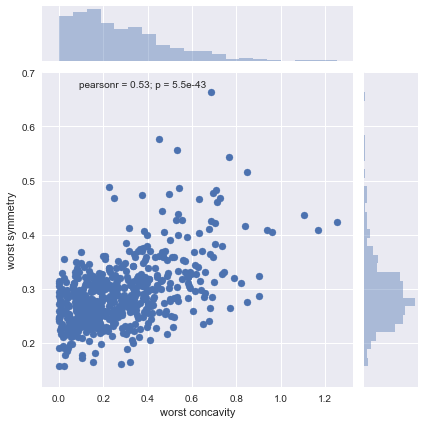

In [16]:
sns.jointplot(x="worst concavity", y="worst symmetry", data=df_feat)

In [17]:
from sklearn.cross_validation import train_test_split

In [18]:
X=df_feat
y=cancer["target"]

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=101)

In [19]:
from sklearn.svm import SVC

In [20]:
model = SVC()

In [21]:
model.fit(X_train,y_train)
#C controls the cost of misclassification
#A high C value has a low bias, and high variance
#low bias because there is a penalty for misclassification with a hight C value
#gamma has to do with free parameter of radius basis function, small gammma = Variance is large, bais is small 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
predict = model.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(confusion_matrix(y_test,predict))

[[  0  66]
 [  0 105]]


In [25]:
print(classification_report(y_test,predict))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        66
          1       0.61      1.00      0.76       105

avg / total       0.38      0.61      0.47       171



/Users/courtneyshearer/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid = {'C':[0.1,1,10,100,1000], "gamma":[1,0.1,0.01,0.001,0.0001]}

In [33]:
grid = GridSearchCV(SVC(),param_grid,verbose=3,refit=True)

In [34]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................... C=0.1, gamma=1, score=0.631579, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................... C=0.1, gamma=1, score=0.631579, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................... C=0.1, gamma=1, score=0.636364, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................. C=0.1, gamma=0.1, score=0.631579, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................. C=0.1, gamma=0.1, score=0.631579, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................. C=0.1, gamma=0.1, score=0.636364, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=0.1 ..................................................
[CV] ................... C=1, gamma=0.1, score=0.631579, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................... C=1, gamma=0.1, score=0.636364, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................. C=1, gamma=0.01, score=0.631579, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................. C=1, gamma=0.01, score=0.631579, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................. C=1, gamma=0.01, score=0.636364, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................. C=1, gamma=0.001, score=0.902256, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................. C=1, gamma=0.001, score=0.939850, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [35]:
grid.best_params_

{'C': 10, 'gamma': 0.0001}

In [36]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
grid_predictions = grid.predict(X_test)

In [38]:
print(confusion_matrix(y_test,grid_predictions))
print("\n")
print(classification_report(y_test,grid_predictions))

[[ 60   6]
 [  3 102]]


             precision    recall  f1-score   support

          0       0.95      0.91      0.93        66
          1       0.94      0.97      0.96       105

avg / total       0.95      0.95      0.95       171

